## 步骤一 处理成单品类的时间维度数据
### 数据整合：整合附件1-附件4的数据


In [1]:
import pandas as pd
from IPython.display import display

# 读取Excel文件中的表格
data1 = pd.read_excel("/Users/zhangying/Desktop/2024美赛/2023国赛/附件1.xlsx", sheet_name=0)
data2 = pd.read_excel("/Users/zhangying/Desktop/2024美赛/2023国赛/附件2.xlsx", sheet_name=0)
data3 = pd.read_excel("/Users/zhangying/Desktop/2024美赛/2023国赛/附件3.xlsx", sheet_name=0)
data4 = pd.read_excel("/Users/zhangying/Desktop/2024美赛/2023国赛/附件4.xlsx", sheet_name=0)
data3 = data3.rename(columns={'日期': '销售日期'})
data4 = data4.rename(columns={'小分类编码': '分类编码'})

# 合并 data1 和 data2，基于 '单品编码'
merged_df_1_2 = pd.merge(data2, data1, on='单品编码')

# 确保 '分类编码' 的类型一致
data4['分类编码'] = data4['分类编码'].astype(str)  # 或者将另一列转换为整数类型 data4['分类编码'].astype(int)
merged_df_1_2['分类编码'] = merged_df_1_2['分类编码'].astype(str)  # 也可以选择转换为整数类型

# 重新进行合并操作
merged_df_1_2_4 = pd.merge(merged_df_1_2, data4, on='分类编码')


# 合并 merged_df_1_2_4 和 data3，基于 '单品编码' 和 '销售日期'
merged_final = pd.merge(merged_df_1_2_4, data3, on=['单品编码', '销售日期'], how='inner')

# 计算每个分类的销售总量
merged_final['销售价'] = merged_final['销售单价(元/千克)'] * merged_final['销量(千克)']




In [ ]:
display(merged_final)

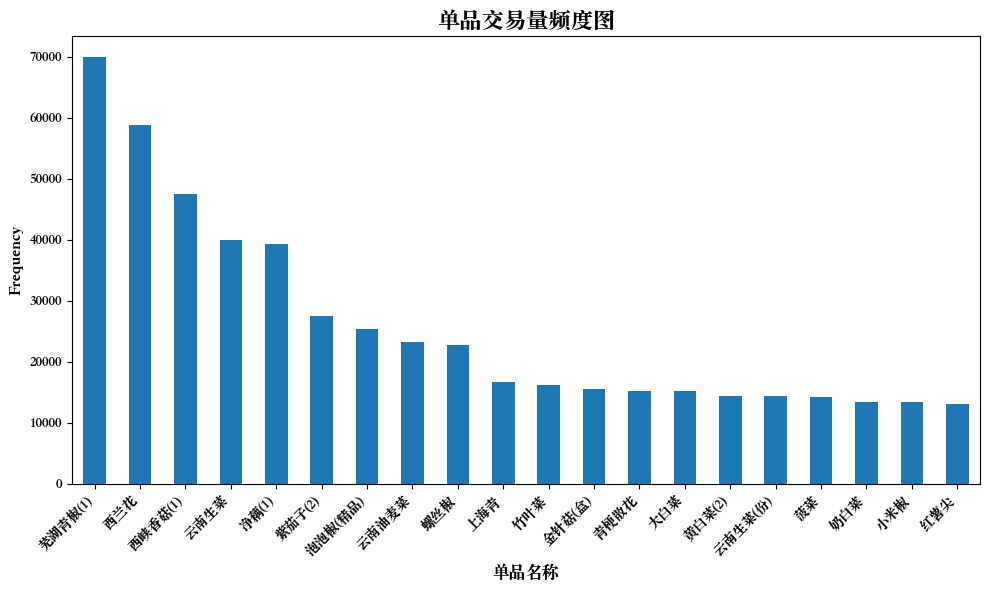

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
# 检查 "单品名称" 列是否存在
if "单品名称" in merged_final.columns:
    # 计算 "单品名称" 的频数
    frequency = merged_final["单品名称"].value_counts()
    # 只取前 20 名
    top_20_frequency = frequency.head(20)
    # 画频度分布图
    plt.figure(figsize=(10, 6))
    top_20_frequency.plot(kind='bar')
    # 添加标题和轴标签
    plt.title('单品交易量频度图', fontsize=16)
    plt.xlabel('单品名称', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    # 显示图形
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("列 \"单品名称\" 不存在于数据框中。")


### 根据时间绘制直方图

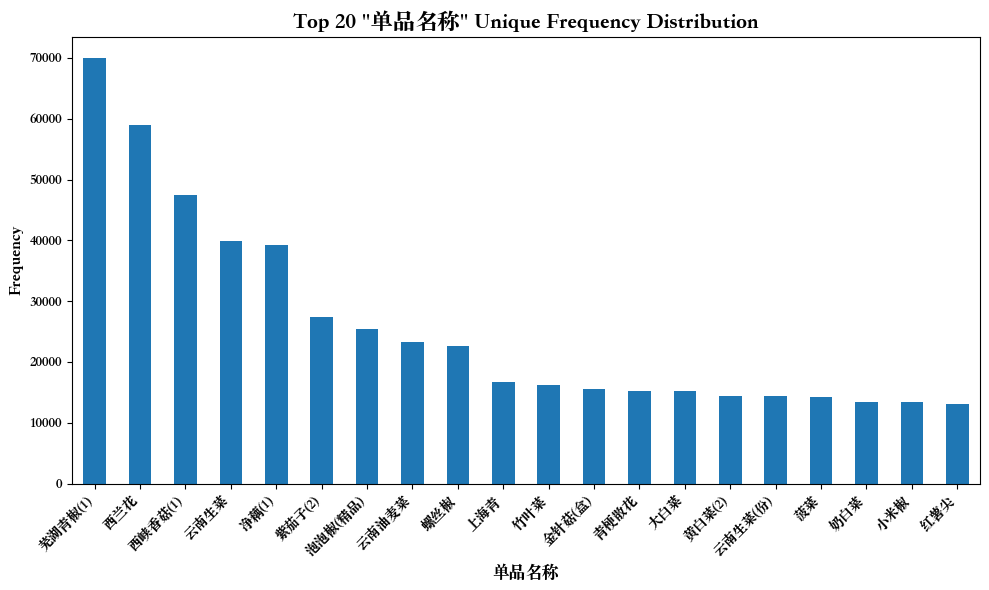

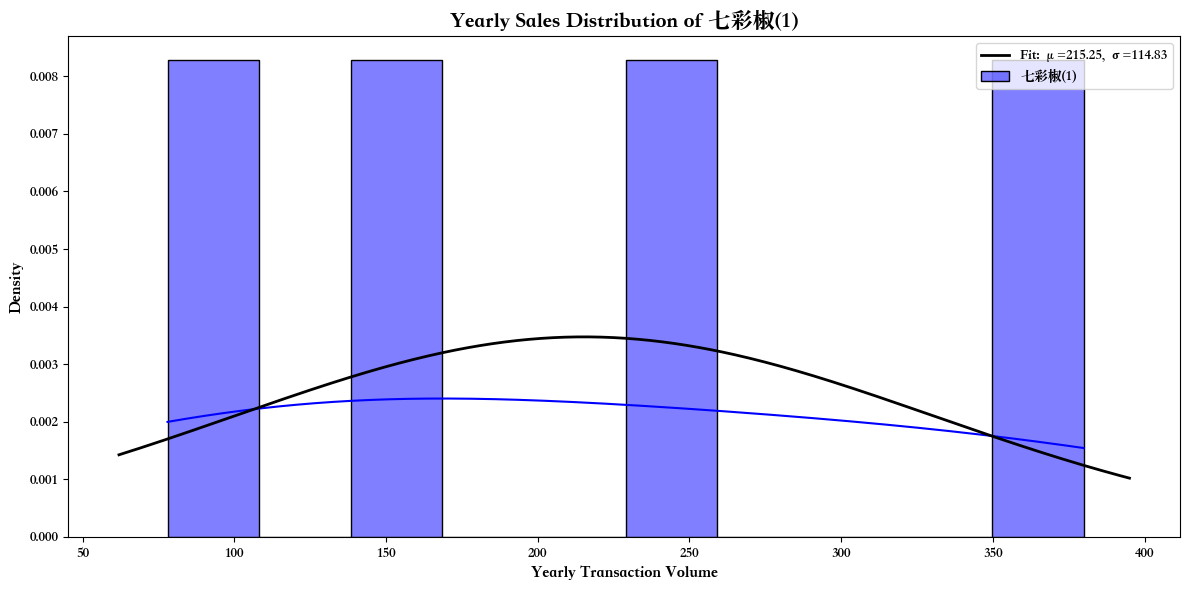

Yearly Skewness: 0.27, Kurtosis: -1.39


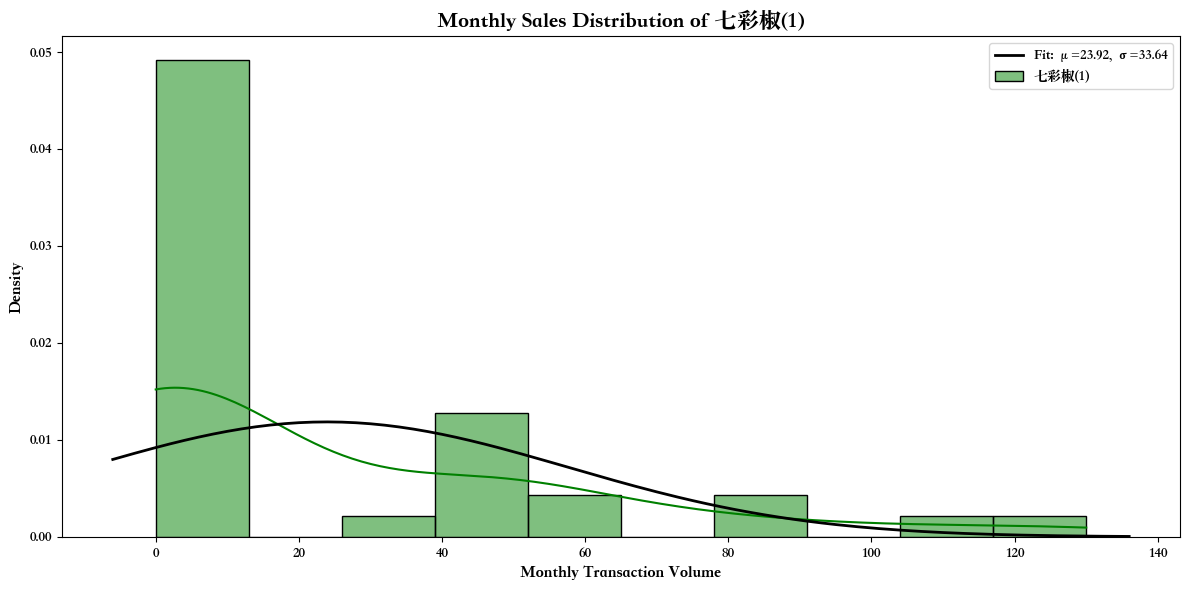

Monthly Skewness: 1.47, Kurtosis: 1.46


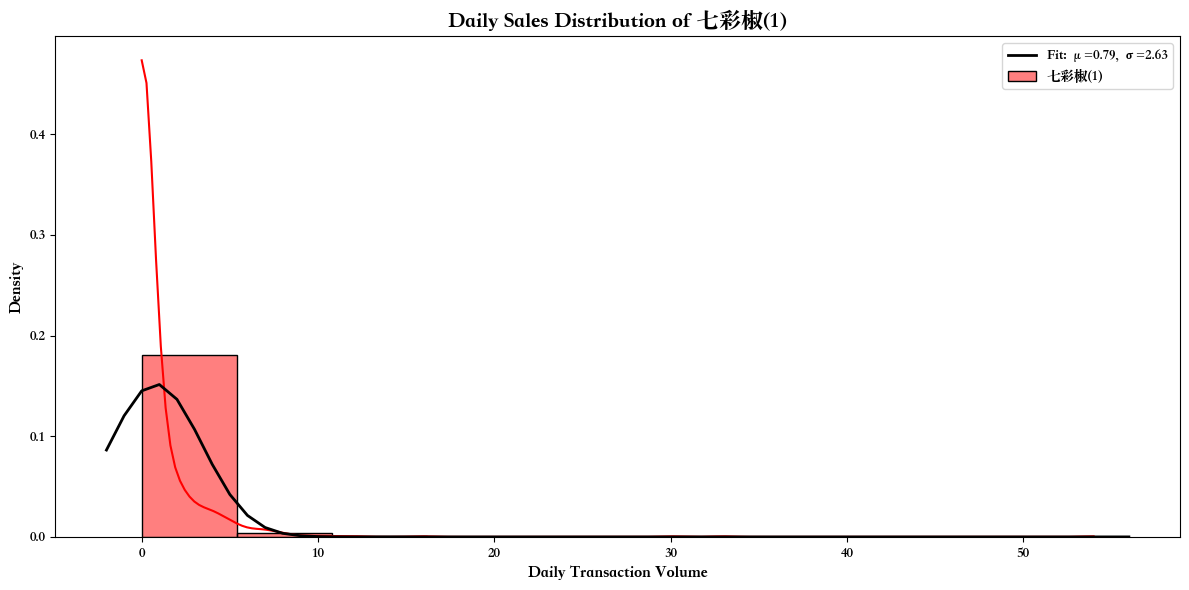

Daily Skewness: 11.35, Kurtosis: 189.44


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

# 假设 merged_final 是一个 pandas 数据框
# merged_final = pd.read_csv('your_file.csv')  # 示例：从 CSV 文件加载数据

# 检查 "单品名称" 列是否存在
if "单品名称" in merged_final.columns:
    # 计算 "单品名称" 的频数
    frequency = merged_final["单品名称"].value_counts()

    # 只取前 20 名
    top_20_frequency = frequency.head(20)

    # 画频度分布图
    plt.figure(figsize=(10, 6))
    top_20_frequency.plot(kind='bar')

    # 添加标题和轴标签
    plt.title('Top 20 "单品名称" Unique Frequency Distribution', fontsize=16)
    plt.xlabel('单品名称', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # 显示图形
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 根据单品名称交易量绘制时间直方图
    if "销售日期" in merged_final.columns and pd.api.types.is_datetime64_any_dtype(merged_final["销售日期"]):
        # 添加销售年份和月份列
        merged_final["销售年份"] = merged_final["销售日期"].dt.year
        merged_final["销售月份"] = merged_final["销售日期"].dt.to_period("M")

        # 按年聚合
        yearly_data = merged_final.groupby(["销售年份", "单品名称"]).size().unstack(fill_value=0)

        # 按月聚合
        monthly_data = merged_final.groupby(["销售月份", "单品名称"]).size().unstack(fill_value=0)

        # 按日聚合
        daily_data = merged_final.groupby(["销售日期", "单品名称"]).size().unstack(fill_value=0)

        # 示例处理单品
        example_product = yearly_data.columns[0]  # 示例选取第一个单品

        # 年度交易量直方图
        plt.figure(figsize=(12, 6))
        sns.histplot(yearly_data[example_product], kde=True, stat="density", label=example_product, bins=10, color='blue')
        mean, std = norm.fit(yearly_data[example_product])
        xmin, xmax = plt.xlim()
        x = pd.Series(range(int(xmin), int(xmax)+1))
        p = norm.pdf(x, mean, std)
        plt.plot(x, p, 'k', linewidth=2, label=f"Fit: μ={mean:.2f}, σ={std:.2f}")
        plt.title(f'Yearly Sales Distribution of {example_product}', fontsize=16)
        plt.xlabel('Yearly Transaction Volume', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend()
        plt.tight_layout()
        plt.show()
        print(f"Yearly Skewness: {skew(yearly_data[example_product]):.2f}, Kurtosis: {kurtosis(yearly_data[example_product]):.2f}")

        # 月度交易量直方图
        plt.figure(figsize=(12, 6))
        sns.histplot(monthly_data[example_product], kde=True, stat="density", label=example_product, bins=10, color='green')
        mean, std = norm.fit(monthly_data[example_product])
        xmin, xmax = plt.xlim()
        x = pd.Series(range(int(xmin), int(xmax)+1))
        p = norm.pdf(x, mean, std)
        plt.plot(x, p, 'k', linewidth=2, label=f"Fit: μ={mean:.2f}, σ={std:.2f}")
        plt.title(f'Monthly Sales Distribution of {example_product}', fontsize=16)
        plt.xlabel('Monthly Transaction Volume', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend()
        plt.tight_layout()
        plt.show()
        print(f"Monthly Skewness: {skew(monthly_data[example_product]):.2f}, Kurtosis: {kurtosis(monthly_data[example_product]):.2f}")

        # 日度交易量直方图
        plt.figure(figsize=(12, 6))
        sns.histplot(daily_data[example_product], kde=True, stat="density", label=example_product, bins=10, color='red')
        mean, std = norm.fit(daily_data[example_product])
        xmin, xmax = plt.xlim()
        x = pd.Series(range(int(xmin), int(xmax)+1))
        p = norm.pdf(x, mean, std)
        plt.plot(x, p, 'k', linewidth=2, label=f"Fit: μ={mean:.2f}, σ={std:.2f}")
        plt.title(f'Daily Sales Distribution of {example_product}', fontsize=16)
        plt.xlabel('Daily Transaction Volume', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend()
        plt.tight_layout()
        plt.show()
        print(f"Daily Skewness: {skew(daily_data[example_product]):.2f}, Kurtosis: {kurtosis(daily_data[example_product]):.2f}")
    else:
        print("列 \"销售日期\" 不存在或不是日期类型。")
else:
    print("列 \"单品名称\" 不存在于数据框中。")


### 基于单品维度

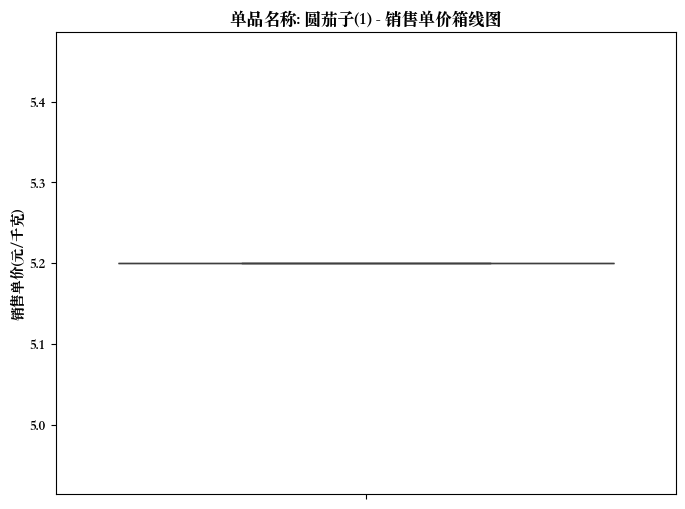

删除了36083行
剩余842420行


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Songti SC']  # 替换为你的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 基于单品维度的销售单价(元/千克)，我们对单价进行IQR处理
def remove_outliers(group):
    Q1 = group['销售单价(元/千克)'].quantile(0.25)
    Q3 = group['销售单价(元/千克)'].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return group[(group['销售单价(元/千克)'] >=lower_bound) & (group['销售单价(元/千克)']<=upper_bound)]
# 绘制箱线图的函数
def plot_boxplot(data, product_name):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data['销售单价(元/千克)'])
    plt.title(f"单品名称: {product_name} - 销售单价箱线图")
    plt.ylabel("销售单价(元/千克)")
    plt.show()
# 选择一个单品名称作为目标绘图
target_product = "圆茄子(1)"  # 请替换为实际单品名称
target_data = merged_final[merged_final['单品名称'] == target_product]

if not target_data.empty:
    plot_boxplot(target_data, target_product)
# 根据分类名称分组，分别进行异常值删除的操作,保存到filtered_data中
filtered_data = merged_final.groupby('单品名称', group_keys=False).apply(remove_outliers)
#filter_data赋值给merged_final
merged_final_1 = filtered_data
#打印数据量
original_count = merged_final.shape[0]
filtered_count = filtered_data.shape[0]
print(f'删除了{original_count-filtered_count}行')
print(f'剩余{filtered_count}行')


### 基于品类维度

In [4]:
# 针对每一个分类名称，累加每一个销售日期的销售价，然后生成新的Dataframe data_category
# 确保按日期和分类进行分组并计算日销量总量

daily_sales = merged_final_1.groupby(['销售日期', '分类名称'])['销量(千克)'].sum().reset_index()
# IQR 方法进行异常值处理
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# 对于每一个分类名称进行异常值处理
cleaned_data = []
for category in daily_sales['分类名称'].unique():
    category_data = daily_sales[daily_sales['分类名称'] == category]
    cleaned_category_data = remove_outliers_iqr(category_data, '销量(千克)')
    cleaned_data.append(cleaned_category_data)

# 合并所有清理后的数据
data_category = pd.concat(cleaned_data).reset_index(drop=True)
# 打印结果
print("清理后的 DataFrame:")
display(data_category)

# 打印完成信息
print("异常值处理完成并生成 data_category。")



# 

清理后的 DataFrame:


,销售日期,分类名称,销量(千克)
0,2020-07-01,水生根茎类,4.850
1,2020-07-02,水生根茎类,4.600
2,2020-07-03,水生根茎类,9.572
3,2020-07-04,水生根茎类,5.439
4,2020-07-05,水生根茎类,4.019
...,...,...,...
6247,2023-06-26,食用菌,39.582
6248,2023-06-27,食用菌,38.708
6249,2023-06-28,食用菌,53.742
6250,2023-06-29,食用菌,48.314


异常值处理完成并生成 data_category。


In [ ]:
# 针对所有的单品，根据